In [1]:
from importlib import reload
import specsanalyzer
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
reload(specsanalyzer)
spa = SpecsAnalyzer()

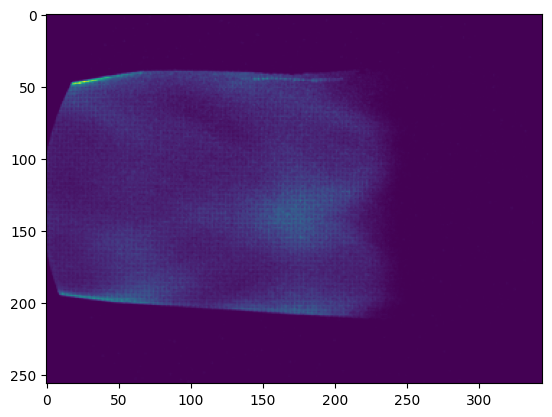

In [3]:
with open('../tests/data/dataEPFL/9159/AVG/000.tsv') as file:
#with open('../tests/data/dataFHI/Scan1232.tsv') as file:
    tsv_data = np.loadtxt(file, delimiter='\t')
plt.figure()
plt.imshow(tsv_data)

New correction matrix
closest_rr_index=  13
rr_factor=  0.5039999999999996
106.3847555751729
25 [0.00321] 4.54 0.00645 4
x_bins-shape (256,)
y_bins-shape (344,)
image-shape (256, 344)


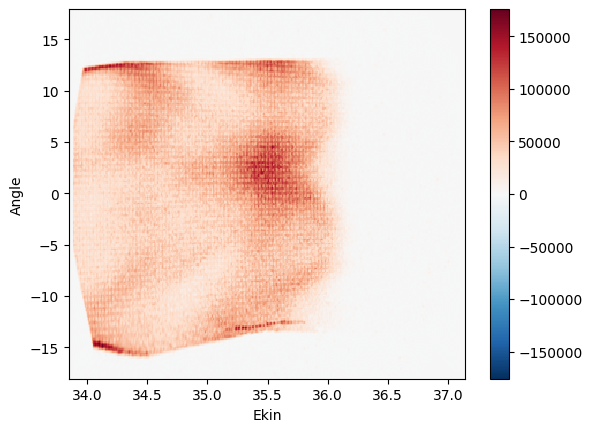

In [4]:
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode="WideAngleMode"
kinetic_energy=35.5
pass_energy=25

res_xarray = spa.convert_image(tsv_data, pass_energy, kinetic_energy, lens_mode)
plt.figure()
res_xarray.plot()

closest_rr_index=  13
rr_factor=  0.5039999999999996
106.3847555751729
25 [0.00321] 4.54 0.00645 4


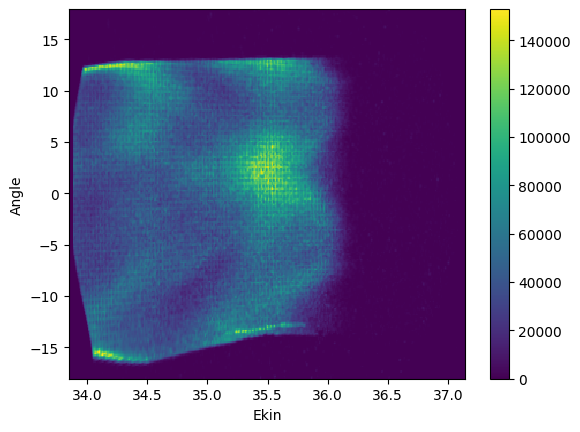

In [5]:
with open('../tests/data/dataEPFL/igor_R9159/data_delay0.tsv') as file:
#with open('../tests/data/dataFHI/Scan1232_converted.tsv') as file:
    ref_data = np.loadtxt(file, delimiter='\t')
    ref_data = ref_data
    #ref_data = ref_data.T
#angle_axis = np.linspace(-18, 17.3077, ref_data.shape[0])
#angle_axis = np.linspace(-18, 17.3077, ref_data.shape[0])

#ek_axis = np.linspace(15.86, 21.1247, ref_data.shape[1])
#ek_axis = np.linspace(33.85, 37.1404, ref_data.shape[1])


import specsanalyzer.convert
reload(specsanalyzer.convert)   
#let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction

spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict=spa.return_config()
lens_mode="WideAngleMode"
kinetic_energy=35.5
pass_energy=25
binning=4

(ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    pass_energy,
    kinetic_energy,
    binning,
    config_dict,
)


ref_xarray = xr.DataArray(
    data=ref_data,
    coords={"Angle": angle_axis, "Ekin": ek_axis},
    dims=["Angle", "Ekin"],
)
plt.figure()
ref_xarray.plot()

In [6]:
#ref_xarray_reint=ref_xarray.interp_like(res_xarray)
#ff_xarray = (res_xarray - ref_xarray_reint)/
ff_xarray = (res_xarray - ref_xarray)
ff_xarray

<xarray.DataArray (Angle: 256, Ekin: 344)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * Angle    (Angle) float64 -18.0 -17.86 -17.72 -17.58 ... 17.58 17.72 17.86
  * Ekin     (Ekin) float64 33.85 33.86 33.87 33.88 ... 37.11 37.12 37.13 37.14

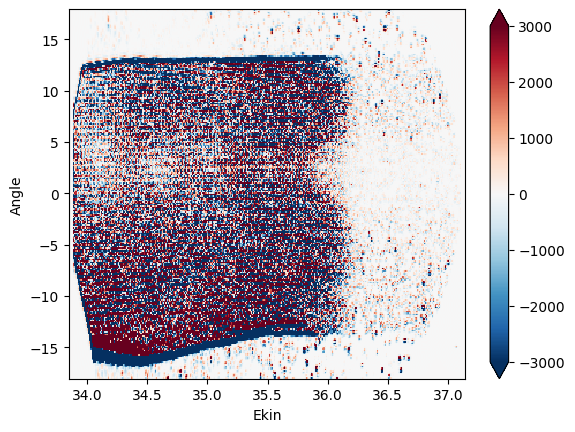

In [7]:
plt.figure()
ff_xarray.plot(cmap='RdBu_r',vmax=3000 )

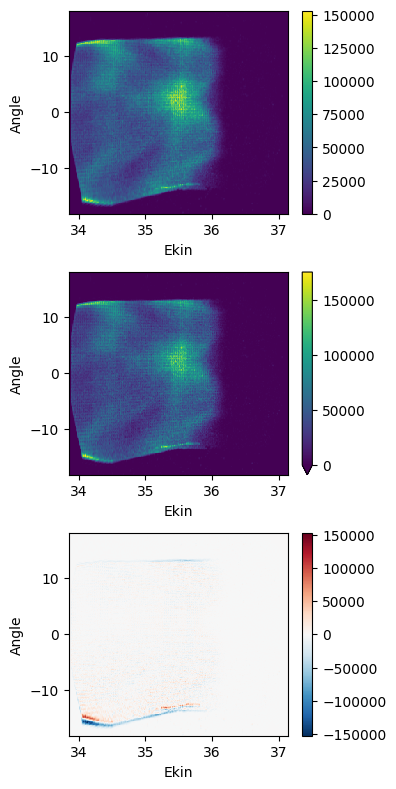

In [16]:
from turtle import title


fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(4, 8))
subplot1=ref_xarray.plot(ax=ax1 )
subplot2=res_xarray.plot(ax=ax2, vmin=0 )
subplot3=ff_xarray.plot(cmap='RdBu_r',ax=ax3 )

plt.tight_layout()



In [9]:
res_xarray

<xarray.DataArray (Angle: 256, Ekin: 344)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * Angle    (Angle) float64 -18.0 -17.86 -17.72 -17.58 ... 17.58 17.72 17.86
  * Ekin     (Ekin) float64 33.85 33.86 33.87 33.88 ... 37.11 37.12 37.13 37.14

In [10]:
ref_xarray

<xarray.DataArray (Angle: 256, Ekin: 344)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * Angle    (Angle) float64 -18.0 -17.86 -17.72 -17.58 ... 17.58 17.72 17.86
  * Ekin     (Ekin) float64 33.85 33.86 33.87 33.88 ... 37.11 37.12 37.13 37.14

In [11]:
print(angle_axis[0],angle_axis[angle_axis.size-1])

-18.0 17.859375


In [12]:
from scipy import interpolate

x = np.arange(-5.01, 5.01, 0.25)

y = np.arange(-5.01, 5.01, 0.3)

xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

f = interpolate.interp2d(x, y, z, kind='cubic')

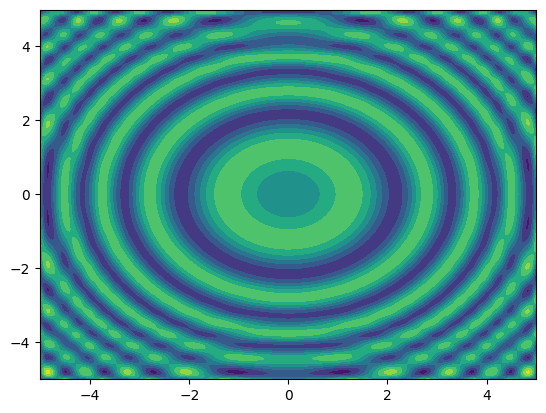

In [13]:
import matplotlib.pyplot as plt

xnew = np.arange(-5.01, 5.01, 1e-2)

ynew = np.arange(-5.01, 5.01, 2e-2)

znew = f(xnew, ynew)

plt.contourf(xnew, ynew, znew)

plt.show()

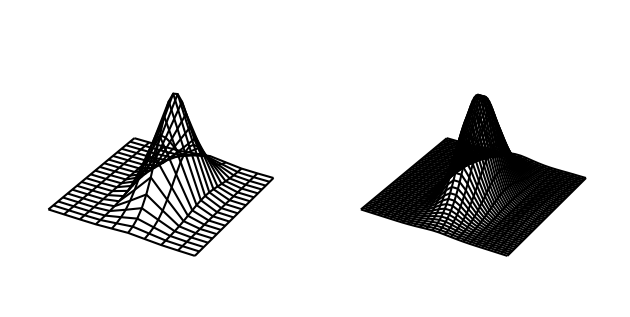

In [14]:
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Regularly-spaced, coarse grid
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)

interp_spline = RectBivariateSpline(y, x, Z)

# Regularly-spaced, fine grid
dx2, dy2 = 0.16, 0.16
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = interp_spline(y2, x2)

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
ax[0].plot_wireframe(X, Y, Z, color='k')

ax[1].plot_wireframe(X2, Y2, Z2, color='k')
for axes in ax:
    axes.set_zlim(-0.2,1)
    axes.set_axis_off()

fig.tight_layout()
plt.show()
